In [1]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def load_images(path, target_size=(32, 32)):
    for img_name in os.listdir(path):
        ages = int(img_name.split("_")[0])
        genders = int(img_name.split("_")[1])

        # Load image and resize
        img = cv2.imread(os.path.join(path, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)  # Resize image
        img = img / 255.0  # Normalize pixel values

        yield img, ages, genders

path = "UTKFace/UTKFace"
images = []
age = []
gender = []

In [4]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [5]:
path = "/content/drive/MyDrive/archive.zip (Unzipped Files)/utkface_aligned_cropped/UTKFace"
images = []
age = []
gender = []

In [7]:
for img, ages, genders in load_images(path):
    images.append(img)
    age.append(ages)
    gender.append(genders)

In [8]:
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=42)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42)

In [9]:
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [22]:
age_model = Sequential()
age_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(32,32,3)))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

#age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
#age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Flatten())
age_model.add(Dropout(0.2))
age_model.add(Dense(512, activation='relu'))

age_model.add(Dense(1, activation='linear', name='age'))

age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 1, 1, 256)        

In [16]:
# Convert lists to NumPy arrays
x_train_age = np.array(x_train_age)
y_train_age = np.array(y_train_age)
x_test_age = np.array(x_test_age)
y_test_age = np.array(y_test_age)

# Check the shapes of the arrays
print('Shapes of x_train_age, y_train_age, x_test_age, y_test_age:')
print(x_train_age.shape, y_train_age.shape, x_test_age.shape, y_test_age.shape)

Shapes of x_train_age, y_train_age, x_test_age, y_test_age:
(17781, 32, 32, 3) (17781,) (5927, 32, 32, 3) (5927,)


In [23]:
history1 = age_model.fit(x_train_age, y_train_age, validation_data=(x_test_age, y_test_age), epochs=50)

Epoch 1/50
556/556 [==============================] - 9s 6ms/step - loss: 429.5904 - mae: 15.9949 - val_loss: 348.9112 - val_mae: 14.0000
Epoch 2/50
556/556 [==============================] - 3s 5ms/step - loss: 302.0414 - mae: 13.4071 - val_loss: 263.7174 - val_mae: 11.8108
Epoch 3/50
556/556 [==============================] - 3s 5ms/step - loss: 229.1485 - mae: 11.4764 - val_loss: 229.7462 - val_mae: 12.2503
Epoch 4/50
556/556 [==============================] - 3s 5ms/step - loss: 199.6712 - mae: 10.5209 - val_loss: 173.9980 - val_mae: 9.7717
Epoch 5/50
556/556 [==============================] - 3s 5ms/step - loss: 170.8428 - mae: 9.6212 - val_loss: 154.5226 - val_mae: 9.2327
Epoch 6/50
556/556 [==============================] - 3s 5ms/step - loss: 151.2307 - mae: 9.0413 - val_loss: 139.1356 - val_mae: 8.5114
Epoch 7/50
556/556 [==============================] - 3s 5ms/step - loss: 139.2556 - mae: 8.6379 - val_loss: 152.5328 - val_mae: 9.4613
Epoch 8/50
556/556 [=====================

In [24]:
age_model.save('age_model_50epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


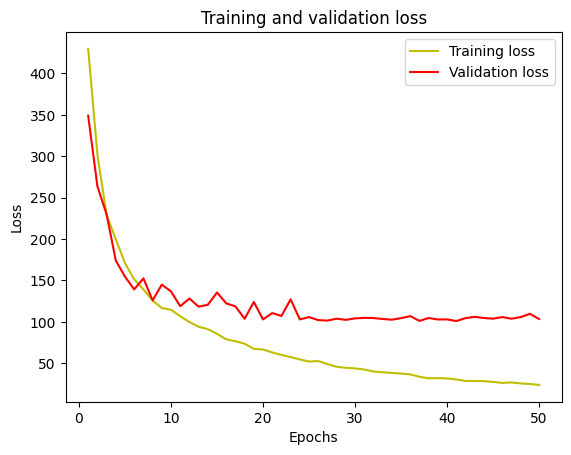

In [28]:
import matplotlib.pyplot as plt
history = history1

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
gender_model = Sequential()

gender_model.add(Conv2D(36, kernel_size=3, activation='relu', input_shape=(32,32,3)))

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

#gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
#gender_model.add(MaxPool2D(pool_size=3, strides=2))

#gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
#gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [37]:
# Convert lists to NumPy arrays for gender model
x_train_gender = np.array(x_train_gender)
y_train_gender = np.array(y_train_gender)
x_test_gender = np.array(x_test_gender)
y_test_gender = np.array(y_test_gender)

# Check the shapes of the arrays for gender model
print('Shapes of x_train_gender, y_train_gender, x_test_gender, y_test_gender:')
print(x_train_gender.shape, y_train_gender.shape, x_test_gender.shape, y_test_gender.shape)

Shapes of x_train_gender, y_train_gender, x_test_gender, y_test_gender:
(17781, 32, 32, 3) (17781,) (5927, 32, 32, 3) (5927,)


In [38]:
history_gender = gender_model.fit(x_train_gender, y_train_gender,validation_data=(x_test_gender, y_test_gender), epochs=50)

Epoch 1/50
556/556 [==============================] - 6s 6ms/step - loss: 0.5318 - accuracy: 0.7208 - val_loss: 0.3804 - val_accuracy: 0.8208
Epoch 2/50
556/556 [==============================] - 3s 5ms/step - loss: 0.3663 - accuracy: 0.8385 - val_loss: 0.3409 - val_accuracy: 0.8434
Epoch 3/50
556/556 [==============================] - 3s 5ms/step - loss: 0.3305 - accuracy: 0.8529 - val_loss: 0.3018 - val_accuracy: 0.8637
Epoch 4/50
556/556 [==============================] - 3s 5ms/step - loss: 0.3121 - accuracy: 0.8623 - val_loss: 0.3210 - val_accuracy: 0.8549
Epoch 5/50
556/556 [==============================] - 3s 5ms/step - loss: 0.2930 - accuracy: 0.8695 - val_loss: 0.2827 - val_accuracy: 0.8704
Epoch 6/50
556/556 [==============================] - 3s 5ms/step - loss: 0.2846 - accuracy: 0.8753 - val_loss: 0.2849 - val_accuracy: 0.8728
Epoch 7/50
556/556 [==============================] - 3s 5ms/step - loss: 0.2746 - accuracy: 0.8786 - val_loss: 0.2859 - val_accuracy: 0.8740
Epoch 

In [39]:
gender_model.save('gender_model_50epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


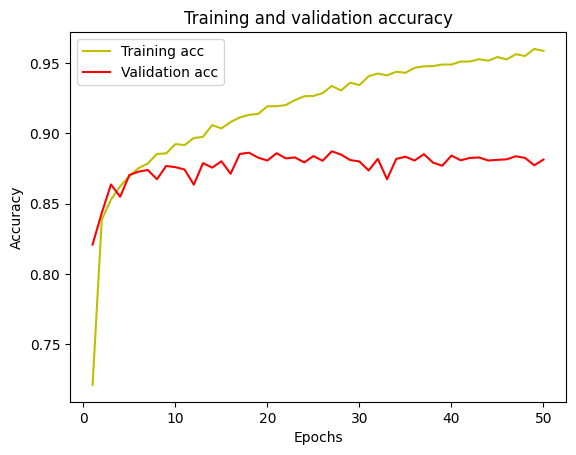

In [45]:
history = history_gender
acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()